# Find non-melt area

Find non-melt area based on 6 years worth of summer data: Jun-Aug 2017-2019 or do May-September?

Opt data available: 01 05 17 - 31 10 2019

Mw data available: 1960? - 2022


google warmest periods; google warmest mean summer, google warmest years. 
In August 2021, the record temperature of 23.6 °C was reported here.

In [1]:
import numpy as np
import xarray
import pandas as pd

from os.path import isfile, join
from os import listdir

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib

In [2]:
# paths 
mw_path  = r"../Data/microwave-rs/non_melt_testing/mw_interpolated/"
path_out = r"../Data/microwave-rs/non_melt_testing/non_melt_indexes/"
path_out_share = r"../AWS_Data/Data/split_indexes/"

## Functions:

In [3]:
def raster_to_pandas(data):
    data = data.to_dataframe().reset_index()[['x', 'y', 'band_data']]
    return data

In [4]:
def remove_data(data):
    data = data[~data['band_data'].isin([-1, 1])]
    data = data[['x', 'y']]
    return data

In [5]:
def merge_dfs(mw_files):
    df_season = []
    
    for mw_file in mw_files:
        #print(mw_file[:10])
        data_mw = xarray.open_dataarray(mw_path + mw_file)
        df = raster_to_pandas(data_mw)
        df = remove_data(df)

        if len(df_season) == 0:
            df_season = df
        else:
            df_season = pd.merge(df_season, df, how = 'inner', on = ['y', 'x'])

        del data_mw    
        del df

    return df_season

## Run in 6 batches (years):

In [14]:
mw_files = [f for f in listdir(mw_path) if isfile(join(mw_path, f))]
years = ['2017', '2018', '2019', '2020', '2021', '2022']

separate = False
cummulative = True

dict_of_df = []
df_all = []
for year_ in years:
    print(year_)
    list_season_dates = [i for i in mw_files if i.startswith(year_)]
    df_season = merge_dfs(list_season_dates)

    if separate:
        df_season['year'] = year_
        dict_of_df.append(df_season)

    if cummulative:
        if len(df_all) == 0:
            df_season['year'] = year_
            df_all = df_season
            dict_of_df.append(df_all)
        else:
            df_all = pd.merge(df_all, df_season, how = 'inner', on = ['y', 'x'])
            df_all['year'] = year_
            dict_of_df.append(df_all)
                    
        del df_season

all = pd.concat(dict_of_df, ignore_index=True)

2017
2018
2019
2020
2021
2022


write

In [17]:
#all.to_parquet(path_out + "melt_separate.parquet")
all.to_parquet(path_out + "melt_cummulative.parquet")

## Load

In [8]:
all_c = pd.read_parquet(path_out + "melt_cummulative.parquet")
#all_s = pd.read_parquet(path_out + "melt_separate.parquet")

Creating grey backgound

In [28]:
gray_df = raster_to_pandas(xarray.open_dataarray(mw_path + '2017-06-06_mw.tif'))
gray_df = gray_df[gray_df['band_data']!= -1] # no water in gray 
gray_df.loc[gray_df['band_data'] == 1, ['band_data']] = 0 # set all values to 0 

## Plotting seasonal changes 

#### Separate:

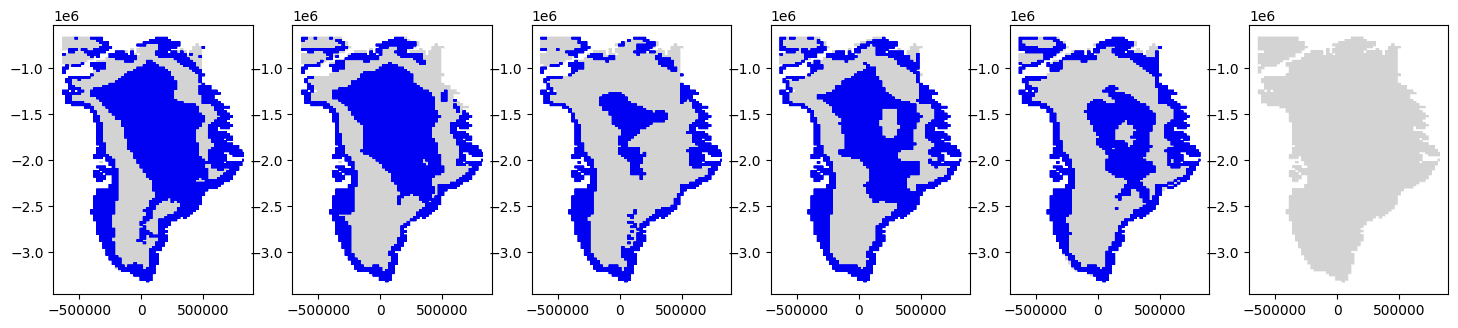

In [11]:
df17_s = all_s[all_s['year'] == '2017']
df18_s = all_s[all_s['year'] == '2018']
df19_s = all_s[all_s['year'] == '2019']
df20_s = all_s[all_s['year'] == '2020']
df21_s = all_s[all_s['year'] == '2021']
df22_s = all_s[all_s['year'] == '2022']


fig, ax = plt.subplots(nrows = 1, ncols = 6, figsize = [3*6, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax[0].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[0].scatter(df17_s["x"], df17_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[1].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[1].scatter(df18_s["x"], df18_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[2].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[2].scatter(df19_s["x"], df19_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[3].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[3].scatter(df20_s["x"], df20_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[4].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[4].scatter(df21_s["x"], df21_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[5].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[5].scatter(df22_s["x"], df22_s["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
# give year names

#### Cummulative:

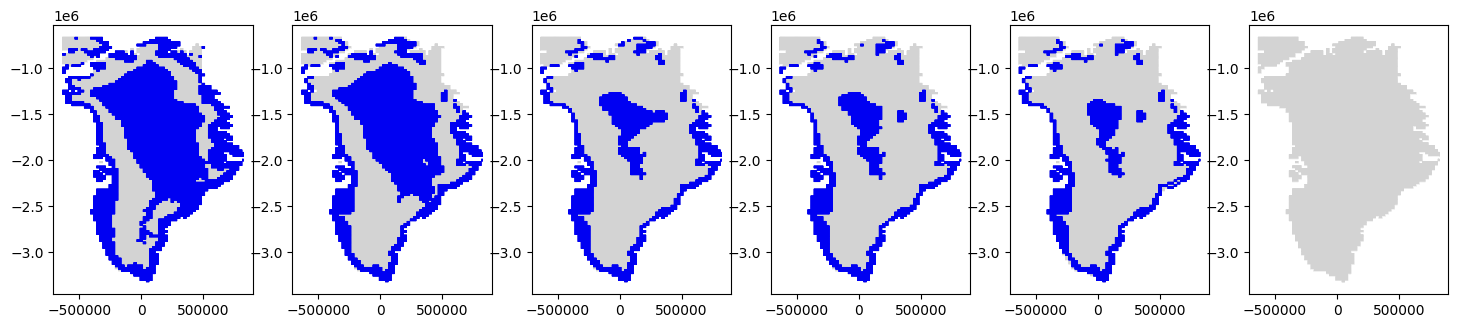

In [8]:
df17_c = all_c[all_c['year'] == '2017']
df18_c = all_c[all_c['year'] == '2018']
df19_c = all_c[all_c['year'] == '2019']
df20_c = all_c[all_c['year'] == '2020']
df21_c = all_c[all_c['year'] == '2021']
df22_c = all_c[all_c['year'] == '2022']

fig, ax = plt.subplots(nrows = 1, ncols = 6, figsize = [3*6, 3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","lightgrey"])
ax[0].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[1].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[2].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[3].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[4].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)
ax[5].scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)

ax[0].scatter(df17_c["x"], df17_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[1].scatter(df18_c["x"], df18_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[2].scatter(df19_c["x"], df19_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[3].scatter(df20_c["x"], df20_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[4].scatter(df21_c["x"], df21_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')
ax[5].scatter(df22_c["x"], df22_c["y"],  edgecolor='none', s = 0.05, color = 'blue', label = 'melt')


## Little melt

In [16]:
# now need littile melting( max 10 perc of tiwe..? compared to others or how)

# insted of remove_data, keep all that are 1
# for each x and y, count all that are 1 

### functions

In [17]:
def remove_data(data):
    data = data[data['band_data'].isin([1])]
    data = data[['x', 'y']]
    return data

In [18]:
def merge_dfs(mw_files):
    df_season = []
    
    for mw_file in mw_files:
        #print(mw_file[:10])
        data_mw = xarray.open_dataarray(mw_path + mw_file)
        df = raster_to_pandas(data_mw)
        df = remove_data(df)

        if len(df_season) == 0:
            df_season = df
        else:
            # concat df with df_season  to one df:
            df_season = pd.concat([df_season, df], ignore_index=True)
            #print(f"num duplicates: {df_season.duplicated().sum()}")
            #df_season = pd.merge(df_season, df, how = 'outer', on = ['y', 'x']) # ignore_index=True

        del data_mw    
        del df

    return df_season

### run

In [ ]:
mw_files = [f for f in listdir(mw_path) if isfile(join(mw_path, f))]
years = ['2017', '2018', '2019', '2020', '2021', '2022']

separate = True

dict_of_df = []
df_all = []
for year_ in years:
    print(year_)
    list_season_dates = [i for i in mw_files if i.startswith(year_)]
    df_season = merge_dfs(list_season_dates)
    # gruop_by x and y and count all that are 1:
    df_season = df_season.groupby(['x', 'y']).size().reset_index(name='counts')
    print(f"{len(df_season[df_season['counts'] < 1])}")

    if separate:
        df_season['year'] = year_
        dict_of_df.append(df_season)
                    
        del df_season

all = pd.concat(dict_of_df, ignore_index=True)

# if cummulative: # group again:
#     all = all.groupby(['x', 'y']).size().reset_index(name='counts')

### save

In [31]:
#all.to_parquet(path_out + "melt_separate.parquet")
all.to_parquet(path_out + "Little_melt_separate.parquet")

### load

In [20]:
all = pd.read_parquet(path_out + "Little_melt_separate.parquet")


### test

In [21]:
all

,x,y,counts,year
0,-636500.0,-961500.0,37,2017
1,-636500.0,-960500.0,37,2017
2,-636500.0,-959500.0,37,2017
3,-636500.0,-958500.0,37,2017
4,-636500.0,-957500.0,37,2017
...,...,...,...,...
5834370,737500.0,-2066500.0,4,2021
5834371,737500.0,-2065500.0,4,2021
5834372,737500.0,-2064500.0,4,2021
5834373,737500.0,-2063500.0,4,2021


In [23]:
len(all[all['counts']==2])/ len(all)

0.13154793786823782

(array([466875., 129375.,  68125.,  60625.,  38750.,  35625.,  18750.,
         18750.,   3125.,   3125.]),
 array([ 2. , 10.4, 18.8, 27.2, 35.6, 44. , 52.4, 60.8, 69.2, 77.6, 86. ]),
 <BarContainer object of 10 artists>)

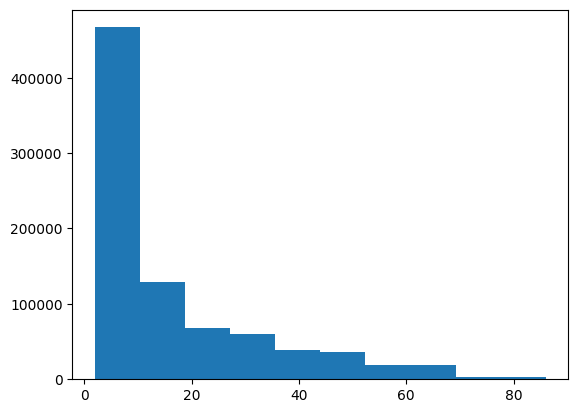

In [14]:
plt.hist(all[all['year']== '2017']['counts'])

In [24]:
# bad:
#all_cummulative = all.groupby(['x', 'y']).size().reset_index(name='counts')
# sum all counts:
all_cummulative2 = all.groupby(['x', 'y'])['counts'].sum().reset_index(name='counts')

In [26]:
all_cummulative2['counts'].min()

2

In [35]:
len(all_cummulative2[all_cummulative2['counts'].isin([2, 3])]) / len(all_cummulative2)

0.1083392729864576

In [37]:
noMelt2 = all_cummulative2[all_cummulative2['counts'].isin([2, 3])][['x', 'y']]


In [38]:
print(f'Percentage of all area that never melts: {round((len(noMelt2)/ len(gray_df))*100, 2)}%')

Percentage of all area that never melts: 8.34%


In [39]:
temp_ = gray_df[gray_df['band_data'] != -1].merge(noMelt2, how = 'left', on  = ['x', 'y'], indicator=True) # create col indicating if pixel is in noMelt data

temp_['melt'] = np.where(temp_['_merge']=='both', 0, 1)
temp_ = temp_[['x', 'y', 'melt']]

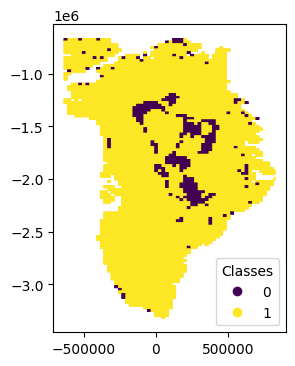

In [40]:
#plot
fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = (3, 4))
#ax.scatter(gray_df["x"], gray_df["y"], edgecolor='none', s = 0.05,  c = 'lightgrey', label = 'no melt')

scatter = ax.scatter(temp_["x"], temp_["y"], c = temp_["melt"],  edgecolor='none', s = 0.05)
handles, labels = scatter.legend_elements()
#labels = ['24.45', 'other', 'c', 'd', 'e', 'f'] # percantages
legend1 = ax.legend(handles, labels, title="Classes", loc="lower right")

In [41]:
path_out_share

'../AWS_Data/Data/split_indexes/'

In [42]:
# save 
temp_.to_parquet(path_out_share + "littleMelt_indexes.parquet", index = False)

### Plot

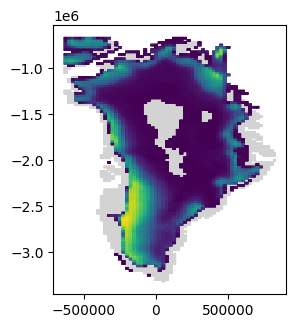

In [58]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [3,3.5])

cmap_white_gray = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lightgrey", "grey"]) # "white",
ax.scatter(gray_df["x"], gray_df["y"],  c=gray_df["band_data"],  edgecolor='none', s = 0.05, cmap = cmap_white_gray)


ax.scatter(all_cummulative2["x"], all_cummulative2["y"],  c = all_cummulative2['counts'], edgecolor='none', s = 0.05,  label = 'melt')



(array([955000., 188750., 135625., 158125., 116250.,  66250.,  46875.,
         40625.,  26875.,  19375.]),
 array([  2. ,  43.5,  85. , 126.5, 168. , 209.5, 251. , 292.5, 334. ,
        375.5, 417. ]),
 <BarContainer object of 10 artists>)

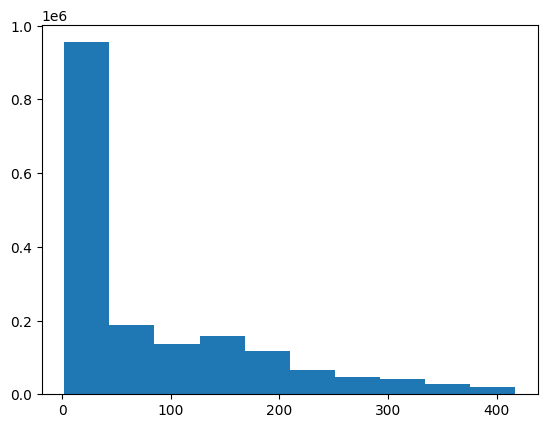

In [55]:
plt.hist(all_cummulative2['counts'])

In [59]:
# find min and max val
# remove 10 percentile of not melting pixels:
all_cummulative2['counts'].quantile(0.01)

2.0

In [64]:
len(all_cummulative2[all_cummulative2['counts']==2])

141250

In [62]:
len(all_cummulative2[all_cummulative2['counts']==1.0]) / len(all_cummulative2)

0.0

In [56]:
all_cummulative2['counts'].max()

417